# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0383 Пустовалова Екатерина. Вариант №63

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними.

**Виды диад:**

1. Взаимная диада: $D_{i,j} = (1, 1)$

2. Ассиметричная диада: $D_{i,j} = (1, 0)$,  $D_{i,j} = (0, 1)$

3. Нулевая диада:  $D_{i,j} = (0, 0)$

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Количество дуг:**
$L \sim B(g(g - 1), \frac{1}{2})$

**Вероятность, что количество дуг равно *l*:**
$P(L = l) = \binom {g(g - 1)}{l} \cdot  2^{g(1 - g)}$

**Индекс взаимности Каца-Пауэлла** $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы склонны взаимно выбирать друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи (или вообще не образовывать их).

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

Подключение необходимых библиотек:

In [ ]:
install.packages("igraph")
install.packages("statnet")
install.packages("network")
install.packages("intergraph")
library(igraph)
library(statnet)
library(network)
library(intergraph)

1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [2]:
graph <-erdos.renyi.game(90, 0.68, 'gnp', TRUE, TRUE)
graph

IGRAPH 368d3a4 D--- 90 5530 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 368d3a4:
  [1]  1->1  2->1  3->1  6->1  8->1  9->1 10->1 11->1 12->1 13->1 14->1 19->1
 [13] 21->1 23->1 24->1 26->1 28->1 29->1 30->1 31->1 33->1 34->1 35->1 36->1
 [25] 37->1 38->1 39->1 40->1 41->1 43->1 46->1 50->1 52->1 53->1 55->1 56->1
 [37] 57->1 58->1 59->1 60->1 61->1 63->1 64->1 65->1 66->1 68->1 70->1 71->1
 [49] 72->1 73->1 74->1 75->1 77->1 79->1 80->1 81->1 83->1 84->1 85->1 86->1
 [61] 87->1 89->1  1->2  2->2  3->2  4->2  8->2  9->2 10->2 12->2 13->2 15->2
 [73] 16->2 17->2 18->2 20->2 22->2 23->2 24->2 25->2 27->2 28->2 29->2 30->2
 [85] 32->2 33->2 34->2 35->2 36->2 38->2 40->2 41->2 42->2 43->2 44->2 46->2
+ ... omitted several edges

Граф строится путём случайного добавления рёбер, вероятность построить граф с $g$ узлами и $M$ рёбрами равна:<br>

$p^M ( 1 − p )^{( n 2 ) − M}$<br>

По мере того, как параметр $p$ растет, модель начинает включать графы с большим числом рёбер с большей вероятностью.

2. Отобразить полученный орграф.

In [ ]:
plot(graph)
net <- asNetwork(graph)
#gplot(net, mode="fruchtermanreingold", gmode = 'graph', displaylabels = TRUE)

Результат:<br><br>
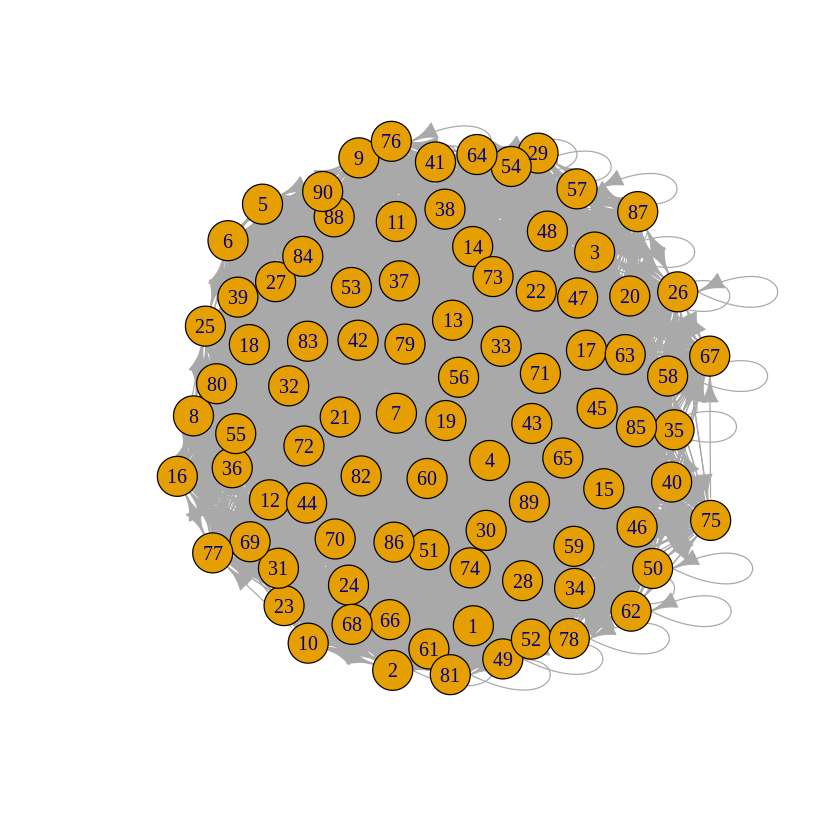

3. Вычислить «пятичисловую сводку» для графа G𝑑.

In [27]:
#Размер
cat('Размер сети: ', network.size(net), "\n")
g = network.size(net)

#Плотность
cat('Плотность сети: ', gden(net), "\n")

#Компотненты
cat('Количество компонент: ', components(net), "\n")

#Диаметр сети
cat("Диаметр сети: ", diameter(graph), "\n")

#Коэффициент кластеризации
cat('Коэффициент кластеризации:', gtrans(net, mode = "graph"))

Размер сети:  90 
Плотность сети:  0.6826467 
Количество компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации: 0.6828469

4. Вычислить цензус диад. Сделать выводы.

In [28]:
census <- dyad_census(graph)
census

$mut
[1] 1877

$asym
[1] 1714

$null
[1] 414

Число взаимных диад - 1877.<br>
Число ассиметричных диад - 1714.<br>
Число пар акторов, между которыми нет связи, - 414.

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [29]:
g <- 90
p <- 0.68
d <- floor(g*p)
M <- census$mut
P1 <- (2*M*(g-1)-g*(d**2))/(g*d*(g-1-d))
cat("При фиксированном выборе:", P1, "\n")

A <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(A))
L2 <- sum(rowSums(A)^2)
P2 <- (2*M*((g-1)**2)-L**2+L2)/(L*((g-1)**2)-L**2+L2)
cat("При свободном выборе:", P2)

При фиксированном выборе: -0.005100182 
При свободном выборе: -0.03714196

Таким образом, в обоих случаях акторам свойственно образовывать односторонние связи (или вообще не образовывать их). 

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [31]:
Pfix <- (d/(g-1))*((d/(g-1))+P1*(g-1-d)/(g-1))
cat("При фиксированном выборе:", Pfix, "\n")

Pfree <- (rowSums(A)*colSums(A))/(g-1)^2
Pfree <- sum(Pfree)/g
cat("При свободном выборе:", Pfree, "\n")

При фиксированном выборе: 0.4686642 
При свободном выборе: 0.4768828 


Вероятности в обоих случаях примерно равны.

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [37]:
summa <- rowSums(A)

g_func <- function(summa, g, t) {
    min_sum <- 0  
    for (i in (t+1):g) {
        min_sum <- min_sum+min(c(t, summa[i]))
    }
    res <- sum(summa[1:t])-t*(t-1)-min_sum
    return(res)
}
g_res <- rep(2, g-1)
for (t in 2:(g-1)) {
    g_res[t] <- g_func(summa, g, t)
}

f_func <- function(summa, g, t) {
    combination <- factorial(t)/(factorial(2)*factorial(t-2))
    res <- sum(summa[1:t])-t*(g-1)-combination 
    return(res)
}
f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- f_func(summa, g, t)
}

M_min <- max(f_res)
M_max <- floor(0.5*sum(summa[1:g])-max(g_res))

Bandiopadhyaya <- (census$mut-M_min)/(M_max-M_min)
cat("Индекс взаимности Бандиопадхьяйя:", Bandiopadhyaya)

Индекс взаимности Бандиопадхьяйя: 0.6791018

Полученный индекс примерно совпадает с данной в условии вероятностью *p* = 0.68.

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [38]:
alpha <- 0.02
binom.test(sum(A), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(A) and g * (g - 1)
number of successes = 5530, number of trials = 8010, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6801318 0.7005035
sample estimates:
probability of success 
              0.690387 


p-value значительно меньше $\alpha$, поэтому нулевая гипотеза отвергается и принимается алтернативная, для которой p-value является максимальным уровнем значимости: p-value $< 2.2 \cdot 10^{-16}$.

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [41]:
binom.test(sum(A), g*(g-1), p = 0.61)


	Exact binomial test

data:  sum(A) and g * (g - 1)
number of successes = 5530, number of trials = 8010, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.61
95 percent confidence interval:
 0.6801318 0.7005035
sample estimates:
probability of success 
              0.690387 


В этом пункте получилась ситуация, аналогичная предыдущему пункту, выводы те же.

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [40]:
g <- 90
laplace <- 0.5-(alpha/2) #Получим 0.49, в таблице значений функции Лапласа этому соответствует число 2.33
#laplace
z_a <- 2.33
po <- (sum(A))/(g*(g-1))
Pl <- po-z_a*sqrt((po*(1-po))/(g*(g-1)))
Pu <- po+z_a*sqrt((po*(1-po))/(g*(g-1)))
cat("Доверительный интервал:", '[', Pl, ',', Pu, ']')

Доверительный интервал: [ 0.6783506 , 0.7024234 ]

Доверительный интервал был вычислен правильно, так как данное в условии значение *p* = 0.68 попадает в этот интервал.

## Выводы

В ходе выполнения данной практической работы был создан случайный орграф на основе модели Эрдеша—Реньи на 90 вершинах с вероятностью появления ребра между вершинами 0.68. Данный граф был отображен, для него была вычислена пятичисловая сводка, цензус диад, индексы Каца—Пауэла и Бандиопадхьяйя, были проверены данные нулевые гипотезы и посчитаны максимальные уровни значимости, при которых гипотеза не отвергается. Также был построен доверительный интервал с надежностью $1 - \alpha$, где $\alpha = 0.02$.